In [81]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import re
import numpy as np

# 1. Import Data

## 1.1 Import Data

### 1.1.1 Data for Groceries

In [82]:
path_tj = Path('store_info.csv')
path_co = Path('costco_store.csv')
path_kr = Path('kroger_store.csv')
path_wf = Path('original_wf_data.csv')
path_tr1 = Path('target.csv')
path_tr2 = Path('targets.csv')
path_wa = Path('walmart_2018_11_06.csv')

In [83]:
df_tj = pd.read_csv(path_tj)
df_co = pd.read_csv(path_co)
df_kr = pd.read_csv(path_kr)
df_wf = pd.read_csv(path_wf, encoding='ISO-8859-1', header=None)
df_tr1 = pd.read_csv(path_tr1, encoding='ISO-8859-1')
df_tr2 = pd.read_csv(path_tr2, encoding='ISO-8859-1')
df_wa = pd.read_csv(path_wa)

### 1.1.2 Data for Cities

In [84]:
path_cities = Path('uscities.xlsx')

In [85]:
df_cities = pd.read_excel(path_cities)

### 1.1.3 Data for Illness

In [86]:
path_illness = Path('IHME_USA_COUNTY_DIABETES_PREVALENCE_1999_2012_NATIONAL_Y2016M08D23.XLSX')
df_illness = pd.read_excel(path_illness)

## 1.2 Observe Data

### 1.2.1 Observe Groceries

In [87]:
df_tj

,store_name,street,city,state,zip,landline,mobile,website
0,Trader Joe's Rancho Palos Verdes (233),31176 Hawthorne Blvd,Rancho Palos Verdes,CA,90275,310-544-1727,310-544-1727,https://locations.traderjoes.com/ca/rancho-pal...
1,Trader Joe's Charlotte (744),1133 Metropolitan Ave,Charlotte,NC,28204,704-334-0737,704-334-0737,https://locations.traderjoes.com/nc/charlotte/...
2,Trader Joe's Sunnyvale (68),316 West El Camino Real,Sunnyvale,CA,94087,408-736-7573,408-736-7573,https://locations.traderjoes.com/ca/sunnyvale/68/
3,Trader Joe's Corona (213),2790 Cabot Dr,Corona,CA,92883,951-603-0299,951-603-0299,https://locations.traderjoes.com/ca/corona/213/
4,Trader Joe's El Cerrito (108),225 El Cerrito Plaza,El Cerrito,CA,94530,510-524-7609,510-524-7609,https://locations.traderjoes.com/ca/el-cerrito...
...,...,...,...,...,...,...,...,...
516,Trader Joe's Chicago - Lincoln Park (691),1840 N Clybourn Ave,Chicago,IL,60614,312-274-9733,312-274-9733,https://locations.traderjoes.com/il/chicago/691/
517,Trader Joe's Concord (83),785 Oak Grove Rd,Concord,CA,94518,925-521-1134,925-521-1134,https://locations.traderjoes.com/ca/concord/83/
518,Trader Joe's San Diego - Point Loma (188),2401 Truxtun Rd,San Diego,CA,92106,619-758-9272,619-758-9272,https://locations.traderjoes.com/ca/san-diego/...
519,Trader Joe's Sandy Springs (731),6277 Roswell Road NE,Sandy Springs,GA,30328,404-236-2414,404-236-2414,https://locations.traderjoes.com/ga/sandy-spri...


In [88]:
df_co

,tid,loc_name,loc_number,loc_type,address_1,country,region_code,hours_of_operation,state,city,postal_code,phone,latitude,longitude,services_included,contact,opening_date,RunDate,InsertUpdateTime,RunID
0,24350,Lincoln,1285,Warehouse,1620 PINE LAKE ROAD,US,MW,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,NE,LINCOLN,68512-3612,(531) 333-7559,40.740257,-96.699317,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2017-10-28,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
1,24351,La Vista,1237,Warehouse,12515 PORTSIDE PARKWAY,US,MW,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,NE,LA VISTA,68128-5622,(402) 378-7398,41.177950,-96.104290,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2016-10-26,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
2,24352,Omaha,1012,Warehouse,12300 W DODGE RD,US,MW,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,NE,OMAHA,68154-2382,(402) 952-3240,41.263601,-96.102275,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2007-10-18,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
3,24353,Wichita,1200,Warehouse,9700 E KELLOGG,US,TE,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,KS,WICHITA,67207-1821,(316) 226-7142,37.679750,-97.224893,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2015-06-03,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
4,24354,Lenexa,349,Warehouse,9350 MARSHALL DR,US,MW,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,KS,LENEXA,66215-3845,(913) 227-3703,38.958687,-94.731243,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2001-11-27,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,25175,Culiacán,5309,NaN,BOULEVARD PEDRO INFANTE,MX,NaN,M-Fri 10:00am - 8:30pm; Sat 9:30am - 9:00pm; S...,NaN,CULIACÁN,80020,NaN,24.798000,-107.425000,Food Court; Gas Station; Pharmacy; Optical Dep...,NaN,"Apr 30, 2015",2022-05-03 08:10:15,2022-05-03 08:34:53,46269
826,25176,Chihuahua,756,NaN,AV DE LA JUVENTUD # 7513,MX,NaN,M-Fri 10:00am - 8:30pm; Sat 9:30am - 9:00pm; S...,Chihuahua,CHIHUAHUA,31115,6144326900,28.696000,-106.131000,Pharmacy,UNKNOWN,"Apr 9, 2013",2022-05-03 08:10:15,2022-05-03 08:34:53,46269
827,25177,Juárez,755,NaN,RANCHO AGUACALIENTE 6911,MX,NaN,M-Fri 10:00am - 8:30pm; Sat 9:30am - 9:00pm; S...,Chihuahua,CD JUAREZ,32610,6562276800,31.758000,-106.509000,Pharmacy,HUGO FLORES,"Jun 2, 2006",2022-05-03 08:10:15,2022-05-03 08:34:53,46269
828,25178,Hermosillo,751,NaN,AV. LUIS DONALDO COLOSIO 416,MX,NaN,M-Fri 10:00am - 8:30pm; Sat 9:30am - 9:00pm; S...,Sonora,HERMOSILLO,83200,6622360620,29.084000,-110.980000,Tire Service Center; Pharmacy; Optical Departm...,JUAN CARLOS CORONADO,"Aug 25, 1994",2022-05-03 08:10:15,2022-05-03 08:34:53,46269


In [89]:
df_kr

,index,TID,loc_name,loc_number,loc_type,brand,address,city,state,neighborhood,postal_code,phone,latitude,longitude,hours_of_operation,services_included,RunID,RunDate,InsertUpdateTime,store_type
0,0,10326,Christiana Mall,00835,J,JEWELRY,"502 Christiana Mall Newark, DE 19702",Newark,DE,NEW CASTLE COUNTY,19702,3.023668e+09,39.678008,-75.652355,Sun: 11:00 AM - 6:00 PM,NaN,46272,2022-05-03 08:17:28,2022-05-03 12:24:46,Store
1,1,10327,Long Neck,00336,C,HART,"26370 Bay Farm Rd Millsboro, DE 19966",Millsboro,DE,SUSSEX COUNTY,19966,3.029452e+09,38.625063,-75.194688,Sun - Sat: 6:00 AM - 10:00 PM,View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-03 12:28:18,Store
2,2,10328,Bayside,00327,C,HART,"31221 Americana Pkwy Selbyville, DE 19975",Selbyville,DE,SUSSEX COUNTY,19975,3.024363e+09,38.470057,-75.113975,Sun - Sat: 6:00 AM - 10:00 PM,View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-03 12:28:18,Store
3,3,10329,Weirton,00803,C,KROGER,"100 Saint Thomas Dr Weirton, WV 26062",Weirton,WV,BROOKE COUNTY,26062,3.047235e+09,40.396772,-80.554085,Sun - Sat: 6:00 AM - 10:00 PM,Online Deli/Bakery Ordering|View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-03 14:45:43,Store
4,4,10330,Hollywood Plaza,00512,C,KROGER,"264 S Hollywood Blvd Steubenville, OH 43952",Steubenville,OH,JEFFERSON COUNTY,43952,7.402645e+09,40.367051,-80.639846,Sun - Sat: 6:00 AM - 10:00 PM,Online Deli/Bakery Ordering|View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-03 14:45:43,Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,3152,13478,West Fairbanks FMJ,00485,J,JEWELRY,"3755 Airport Way Fairbanks, AK 99709",Fairbanks,AK,FAIRBANKS NORTH STAR BOROUGH,99709,9.074741e+09,64.835245,-147.817625,Sun: 11:00 AM - 6:00 PM,NaN,46272,2022-05-03 08:17:28,2022-05-05 18:34:00,Store
3153,3153,13479,Fairbanks Bush Mail Only,00902,PU,FRED,"3755 Airport Way Fairbanks, AK 99709",Fairbanks,AK,FAIRBANKS NORTH STAR BOROUGH,99709,9.074741e+09,64.835365,-147.817645,NaN,View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-05 18:34:00,Store
3154,3154,13480,West Fairbanks,00485,O,FRED,"3755 Airport Way Fairbanks, AK 99709",Fairbanks,AK,FAIRBANKS NORTH STAR BOROUGH,99709,9.074741e+09,64.835365,-147.817645,Sun - Sat: 6:00 AM - 11:00 PM,Online Deli/Bakery Ordering|View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-05 18:34:00,Store
3155,3155,13481,Juneau FMJ,00158,J,JEWELRY,"8181 Glacier Hwy Juneau, AK 99801",Juneau,AK,JUNEAU BOROUGH,99801,9.077897e+09,58.359513,-134.561863,Sun: 11:00 AM - 6:00 PM,NaN,46272,2022-05-03 08:17:28,2022-05-05 18:39:09,Store


In [90]:
df_wf

,0,1,2,3
0,-86.752554,33.460451,"Whole Foods-Birmingham,AL","3100 Cahaba Village Plaza, Birmingham,AL 35243..."
1,-86.590416,34.712443,"Whole Foods-Huntsville,AL","2501 Memorial Pkwy SW, Huntsville,AL 35801, (2..."
2,-88.150461,30.676137,"Whole Foods-Mobile,AL","3968 Airport Blvd, Mobile,AL 36608, (251) 206-..."
3,-86.171404,32.357815,"Whole Foods-Montgomery,AL","1450 Taylor Rd, Montgomery,AL 36117, (334) 523..."
4,-94.145078,36.113563,"Whole Foods-Fayetteville,AR","3425 N College Avenue, Fayetteville,AR 72703, ..."
...,...,...,...,...
454,-122.536232,47.227390,"Whole Foods-University Place,WA","3515 Bridgeport Way West, University Place,WA ..."
455,-122.507387,45.615538,"Whole Foods-Vancouver,WA","815 Southeast 160th Avenue, Vancouver,WA 98683..."
456,-89.443819,43.075100,"Whole Foods-Madison,WI","3313 University Ave, Madison,WI 53705, (608) 2..."
457,-87.883706,43.060374,"Whole Foods-Milwaukee,WI","2305 N Prospect Ave, Milwaukee,WI 53211, (414)..."


In [91]:
df_tr1

,X.locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,...,Is24Hours.Sat,IsOpen.Sat,Summary.Sat,ThruTime.Sat,BeginTime.Sun,Is24Hours.Sun,IsOpen.Sun,Summary.Sun,ThruTime.Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,...,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,en-US,22832 US Highway 281 N,NaN,San Antonio,United States,Bexar,"22832 US Highway 281 N, San Antonio, TX 78258-...",NEC Hwy 281 & Stone Oak Pkwy,29.653311,-98.445034,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Bakery', 'CVS pharmacy', 'Cafe-Pizza', 'Deli..."
1825,en-US,135 Creekside Way,NaN,New Braunfels,United States,Comal,"135 Creekside Way, New Braunfels, TX 78130-6248",NEC I-35 & FM 483,29.730890,-98.073444,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Accepts WIC', 'CVS pharmacy', 'Cafe-Pizza', ..."
1826,en-US,700 Barnes Dr,NaN,San Marcos,United States,Hays,"700 Barnes Dr, San Marcos, TX 78666-6187",NWC I-35 & McCarty Ln,29.846426,-97.970298,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
1827,en-US,5188 Kyle Center Dr,NaN,Kyle,United States,Hays,"5188 Kyle Center Dr, Kyle, TX 78640-6137",SWC I-35 & Kyle Pkwy,30.011692,-97.864363,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Drive Up', 'Fr..."


In [92]:
df_tr2

,@locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,...,Is24Hours Sat,IsOpen Sat,Summary Sat,ThruTime Sat,BeginTime Sun,Is24Hours Sun,IsOpen Sun,Summary Sun,ThruTime Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,...,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,en-US,22832 US Highway 281 N,NaN,San Antonio,United States,Bexar,"22832 US Highway 281 N, San Antonio, TX 78258-...",NEC Hwy 281 & Stone Oak Pkwy,29.653311,-98.445034,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Bakery', 'CVS pharmacy', 'Cafe-Pizza', 'Deli..."
1825,en-US,135 Creekside Way,NaN,New Braunfels,United States,Comal,"135 Creekside Way, New Braunfels, TX 78130-6248",NEC I-35 & FM 483,29.730890,-98.073444,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Accepts WIC', 'CVS pharmacy', 'Cafe-Pizza', ..."
1826,en-US,700 Barnes Dr,NaN,San Marcos,United States,Hays,"700 Barnes Dr, San Marcos, TX 78666-6187",NWC I-35 & McCarty Ln,29.846426,-97.970298,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
1827,en-US,5188 Kyle Center Dr,NaN,Kyle,United States,Hays,"5188 Kyle Center Dr, Kyle, TX 78640-6137",SWC I-35 & Kyle Pkwy,30.011692,-97.864363,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Drive Up', 'Fr..."


In [93]:
df_wa

,index,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,...,email_2,website,open_hours,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
0,0,Conway Supercenter,https://www.walmart.com/store/5/conway-ar/details,1155 Hwy 65 North,Conway,AR,72032,US,501-329-0023,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",35.108660,-92.436905,NaN,NaN,NaN,NaN,NaN
1,1,Sikeston Supercenter,https://www.walmart.com/store/9/sikeston-mo/de...,1303 S Main St,Sikeston,MO,63801,US,573-472-3020,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.857394,-89.586051,NaN,NaN,NaN,NaN,NaN
2,2,Tahlequah Supercenter,https://www.walmart.com/store/10/tahlequah-ok/...,2020 S Muskogee Ave,Tahlequah,OK,74464,US,918-456-8804,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",35.888765,-94.979859,NaN,NaN,NaN,NaN,NaN
3,3,Mountain Home Supercenter,https://www.walmart.com/store/11/mountain-home...,65 Wal Mart Dr,Mountain Home,AR,72653,US,870-492-9299,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.354957,-92.341026,NaN,NaN,NaN,NaN,NaN
4,4,Claremore Supercenter,https://www.walmart.com/store/12/claremore-ok/...,1500 S Lynn Riggs Blvd,Claremore,OK,74017,US,918-341-2765,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.293955,-95.627125,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,4649,Pearland Neighborhood Market,https://www.walmart.com/store/7361/pearland-tx...,12631 Broadway Street,Pearland,TX,77584,US,713-570-7925,NaN,...,NaN,NaN,"monday - friday : 06:00-23:00, saturday : 06:0...",29.556350,-95.415783,NaN,NaN,NaN,NaN,NaN
4650,4650,Bentonville Gas Station,https://www.walmart.com/store/7368/bentonville...,1300 S Walton Blvd,Bentonville,AR,72712,US,479-271-2209,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.357486,-94.214669,NaN,NaN,NaN,NaN,NaN
4651,4651,Millcreek Pickup only,https://www.walmart.com/store/8855/millcreek-u...,3701 S Highland Dr,Millcreek,UT,84106,US,801-467-2882,NaN,...,NaN,NaN,"monday - friday : 08:00-20:00, saturday : 08:0...",40.691031,-111.846529,NaN,NaN,NaN,NaN,NaN
4652,4652,Dallas Supercenter,https://www.walmart.com/store/8930/dallas-tx/d...,15757 Coit Rd,Dallas,TX,75248,US,972-235-0681,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",32.963412,-96.770294,NaN,NaN,NaN,NaN,NaN


### 1.2.2 Observe Cities

In [94]:
df_cities = pd.read_excel(path_cities)
df_cities

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11080.3,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3184.7,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4614.5,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4758.9,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1384.0,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31115,Kohatk,Kohatk,AZ,Arizona,4021,Pinal,32.5781,-112.0032,0,77.3,shape,False,False,America/Phoenix,3,85634,1840022983
31116,Ironville,Ironville,PA,Pennsylvania,42013,Blair,40.6586,-78.2155,0,59.2,shape,False,False,America/New_York,3,16686,1840152922
31117,Newkirk,Newkirk,NM,New Mexico,35019,Guadalupe,35.0635,-104.2715,0,0.0,shape,False,False,America/Denver,3,88417,1840024978
31118,Falcon Village,Falcon Village,TX,Texas,48427,Starr,26.5652,-99.1341,0,38.9,shape,False,False,America/Chicago,3,78545,1840018314


In [95]:
df_cities.describe()

,county_fips,lat,lng,population,density,ranking,id
count,31120.000000,31120.000000,31120.000000,3.112000e+04,31120.000000,31120.000000,3.112000e+04
mean,29909.744987,38.622569,-92.853420,1.288392e+04,466.928972,2.988785,1.838127e+09
std,15826.480764,5.856675,15.650888,1.795881e+05,728.345636,0.302792,1.986279e+07
min,1001.000000,17.955900,-176.629500,0.000000e+00,0.000000,1.000000,1.630024e+09
25%,17197.000000,35.169950,-98.291500,2.720000e+02,89.300000,3.000000,1.840008e+09
50%,30013.000000,39.332150,-90.106300,9.570000e+02,247.400000,3.000000,1.840016e+09
75%,42043.000000,41.718175,-81.831750,3.768250e+03,548.900000,3.000000,1.840024e+09
max,72153.000000,71.272700,174.111000,1.890861e+07,28653.900000,5.000000,1.840153e+09


In [96]:
df_cities.isnull().sum()

city            0
city_ascii      0
state_id        0
state_name      0
county_fips     0
county_name     0
lat             0
lng             0
population      0
density         0
source          0
military        0
incorporated    0
timezone        0
ranking         0
zips            2
id              0
dtype: int64

### 1.2.3 Observe Illness

In [97]:
df_illness = pd.read_excel(path_illness, sheet_name='Diagnosed')  # read the value in the 'Diagnosed' sheet
df_illness

,Age-Standardized Diagnosed Diabetes Prevalence (%),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females",...,"Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
1,National,NaN,6.52,6.27,6.78,6.96,6.7,7.23,7.37,7.1,...,10.21,9.98,9.6,10.38,10.22,9.85,10.62,56.61,57.09,56.85
2,Alabama,1,7.94,7.78,8.1,8.41,8.25,8.58,8.93,8.78,...,11.59,11.74,11.76,11.72,12.08,12.01,12.16,50.03,54.38,52.23
3,Autauga County,1001,7.84,7.7,7.99,8.25,8.09,8.42,8.67,8.47,...,11.21,11.24,10.84,11.68,11.44,10.92,12,50.21,41.97,46.03
4,Baldwin County,1003,6.35,5.5,7.26,6.73,5.85,7.66,7.15,6.27,...,10.12,9.52,8.87,10.22,9.76,9.16,10.39,43.24,66.52,53.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,Sweetwater County,56037,5.52,5.09,5.99,5.85,5.39,6.35,6.2,5.74,...,9.35,9.05,8.56,9.58,9.23,8.72,9.78,63.27,71.42,67.14
3191,Teton County,56039,3.25,3.18,3.33,3.6,3.53,3.68,3.88,3.8,...,5.82,5.81,5.66,5.97,5.91,5.76,6.07,82,81.26,81.63
3192,Uinta County,56041,5.22,5.15,5.3,5.57,5.51,5.64,5.88,5.8,...,8.35,8.12,7.72,8.56,8.57,8.11,9.05,70.73,57.53,64.02
3193,Washakie County,56043,5.64,6.07,5.19,5.97,6.41,5.5,6.21,6.58,...,8.08,7.94,7.73,8.15,8.27,7.92,8.63,66.45,30.54,46.53


# 2. Data Processing

## 2.1 Processing Data for Groceries

### 2.1.1 Deal With Them Separately

#### 2.1.1.1 Trader Joe's

In [98]:
df_tj   # show the data

,store_name,street,city,state,zip,landline,mobile,website
0,Trader Joe's Rancho Palos Verdes (233),31176 Hawthorne Blvd,Rancho Palos Verdes,CA,90275,310-544-1727,310-544-1727,https://locations.traderjoes.com/ca/rancho-pal...
1,Trader Joe's Charlotte (744),1133 Metropolitan Ave,Charlotte,NC,28204,704-334-0737,704-334-0737,https://locations.traderjoes.com/nc/charlotte/...
2,Trader Joe's Sunnyvale (68),316 West El Camino Real,Sunnyvale,CA,94087,408-736-7573,408-736-7573,https://locations.traderjoes.com/ca/sunnyvale/68/
3,Trader Joe's Corona (213),2790 Cabot Dr,Corona,CA,92883,951-603-0299,951-603-0299,https://locations.traderjoes.com/ca/corona/213/
4,Trader Joe's El Cerrito (108),225 El Cerrito Plaza,El Cerrito,CA,94530,510-524-7609,510-524-7609,https://locations.traderjoes.com/ca/el-cerrito...
...,...,...,...,...,...,...,...,...
516,Trader Joe's Chicago - Lincoln Park (691),1840 N Clybourn Ave,Chicago,IL,60614,312-274-9733,312-274-9733,https://locations.traderjoes.com/il/chicago/691/
517,Trader Joe's Concord (83),785 Oak Grove Rd,Concord,CA,94518,925-521-1134,925-521-1134,https://locations.traderjoes.com/ca/concord/83/
518,Trader Joe's San Diego - Point Loma (188),2401 Truxtun Rd,San Diego,CA,92106,619-758-9272,619-758-9272,https://locations.traderjoes.com/ca/san-diego/...
519,Trader Joe's Sandy Springs (731),6277 Roswell Road NE,Sandy Springs,GA,30328,404-236-2414,404-236-2414,https://locations.traderjoes.com/ga/sandy-spri...


In [99]:
df_tj.describe()    # describe the data

,store_name,street,city,state,zip,landline,mobile,website
count,521,521,521,521,521,521,521,516
unique,521,521,402,47,505,521,521,516
top,Trader Joe's Rancho Palos Verdes (233),31176 Hawthorne Blvd,Los Angeles,CA,90275,310-544-1727,310-544-1727,https://locations.traderjoes.com/ca/rancho-pal...
freq,1,1,11,185,2,1,1,1


In [100]:
df_tj.isnull().sum()    # check the missing values

store_name    0
street        0
city          0
state         0
zip           0
landline      0
mobile        0
website       5
dtype: int64

In [101]:
df_tj = df_tj.copy()
df_tj = df_tj[['city', 'state']]    # keep the columns that we need
df_tj.loc[:, 'number'] = 1  # every row means one store
df_tj

,city,state,number
0,Rancho Palos Verdes,CA,1
1,Charlotte,NC,1
2,Sunnyvale,CA,1
3,Corona,CA,1
4,El Cerrito,CA,1
...,...,...,...
516,Chicago,IL,1
517,Concord,CA,1
518,San Diego,CA,1
519,Sandy Springs,GA,1


#### 2.1.1.2 Costco

In [102]:
df_co   # show the data

,tid,loc_name,loc_number,loc_type,address_1,country,region_code,hours_of_operation,state,city,postal_code,phone,latitude,longitude,services_included,contact,opening_date,RunDate,InsertUpdateTime,RunID
0,24350,Lincoln,1285,Warehouse,1620 PINE LAKE ROAD,US,MW,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,NE,LINCOLN,68512-3612,(531) 333-7559,40.740257,-96.699317,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2017-10-28,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
1,24351,La Vista,1237,Warehouse,12515 PORTSIDE PARKWAY,US,MW,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,NE,LA VISTA,68128-5622,(402) 378-7398,41.177950,-96.104290,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2016-10-26,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
2,24352,Omaha,1012,Warehouse,12300 W DODGE RD,US,MW,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,NE,OMAHA,68154-2382,(402) 952-3240,41.263601,-96.102275,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2007-10-18,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
3,24353,Wichita,1200,Warehouse,9700 E KELLOGG,US,TE,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,KS,WICHITA,67207-1821,(316) 226-7142,37.679750,-97.224893,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2015-06-03,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
4,24354,Lenexa,349,Warehouse,9350 MARSHALL DR,US,MW,Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...,KS,LENEXA,66215-3845,(913) 227-3703,38.958687,-94.731243,Food Court; Gas Station; Hearing Aids; Optical...,NaN,2001-11-27,2022-05-03 08:10:15,2022-05-03 08:10:30,46269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,25175,Culiacán,5309,NaN,BOULEVARD PEDRO INFANTE,MX,NaN,M-Fri 10:00am - 8:30pm; Sat 9:30am - 9:00pm; S...,NaN,CULIACÁN,80020,NaN,24.798000,-107.425000,Food Court; Gas Station; Pharmacy; Optical Dep...,NaN,"Apr 30, 2015",2022-05-03 08:10:15,2022-05-03 08:34:53,46269
826,25176,Chihuahua,756,NaN,AV DE LA JUVENTUD # 7513,MX,NaN,M-Fri 10:00am - 8:30pm; Sat 9:30am - 9:00pm; S...,Chihuahua,CHIHUAHUA,31115,6144326900,28.696000,-106.131000,Pharmacy,UNKNOWN,"Apr 9, 2013",2022-05-03 08:10:15,2022-05-03 08:34:53,46269
827,25177,Juárez,755,NaN,RANCHO AGUACALIENTE 6911,MX,NaN,M-Fri 10:00am - 8:30pm; Sat 9:30am - 9:00pm; S...,Chihuahua,CD JUAREZ,32610,6562276800,31.758000,-106.509000,Pharmacy,HUGO FLORES,"Jun 2, 2006",2022-05-03 08:10:15,2022-05-03 08:34:53,46269
828,25178,Hermosillo,751,NaN,AV. LUIS DONALDO COLOSIO 416,MX,NaN,M-Fri 10:00am - 8:30pm; Sat 9:30am - 9:00pm; S...,Sonora,HERMOSILLO,83200,6622360620,29.084000,-110.980000,Tire Service Center; Pharmacy; Optical Departm...,JUAN CARLOS CORONADO,"Aug 25, 1994",2022-05-03 08:10:15,2022-05-03 08:34:53,46269


In [103]:
df_co.describe()    # describe the data

,tid,loc_number,latitude,longitude,RunID
count,830.000000,830.000000,830.000000,830.000000,830.0
mean,24764.500000,1141.914458,37.324120,-72.940174,46269.0
std,239.744656,1386.052008,12.204222,70.991301,0.0
min,24350.000000,1.000000,-37.975000,-159.382315,46269.0
25%,24557.250000,391.500000,33.805160,-116.552990,46269.0
50%,24764.500000,712.500000,38.823571,-88.413890,46269.0
75%,24971.750000,1183.750000,43.335297,-75.739245,46269.0
max,25179.000000,5701.000000,64.851944,174.608000,46269.0


In [104]:
df_co.isnull().sum()    # checking the missing values

tid                     0
loc_name                0
loc_number              0
loc_type              123
address_1               0
country                 0
region_code           123
hours_of_operation      7
state                  41
city                    0
postal_code             5
phone                  58
latitude                0
longitude               0
services_included      13
contact               745
opening_date            0
RunDate                 0
InsertUpdateTime        0
RunID                   0
dtype: int64

In [105]:
df_co = df_co.copy()
df_co = df_co[df_co['country']=='US'].reset_index().drop('index', axis=1)   # just pick stores in US
df_co.loc[:,'number'] = 1
df_co = df_co[['city', 'state', 'number']]
df_co

,city,state,number
0,LINCOLN,NE,1
1,LA VISTA,NE,1
2,OMAHA,NE,1
3,WICHITA,KS,1
4,LENEXA,KS,1
...,...,...,...
568,HONOLULU,HI,1
569,HONOLULU,HI,1
570,WAIPAHU,HI,1
571,KAPOLEI,HI,1


#### 2.1.1.3 Kroger

In [106]:
df_kr

,index,TID,loc_name,loc_number,loc_type,brand,address,city,state,neighborhood,postal_code,phone,latitude,longitude,hours_of_operation,services_included,RunID,RunDate,InsertUpdateTime,store_type
0,0,10326,Christiana Mall,00835,J,JEWELRY,"502 Christiana Mall Newark, DE 19702",Newark,DE,NEW CASTLE COUNTY,19702,3.023668e+09,39.678008,-75.652355,Sun: 11:00 AM - 6:00 PM,NaN,46272,2022-05-03 08:17:28,2022-05-03 12:24:46,Store
1,1,10327,Long Neck,00336,C,HART,"26370 Bay Farm Rd Millsboro, DE 19966",Millsboro,DE,SUSSEX COUNTY,19966,3.029452e+09,38.625063,-75.194688,Sun - Sat: 6:00 AM - 10:00 PM,View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-03 12:28:18,Store
2,2,10328,Bayside,00327,C,HART,"31221 Americana Pkwy Selbyville, DE 19975",Selbyville,DE,SUSSEX COUNTY,19975,3.024363e+09,38.470057,-75.113975,Sun - Sat: 6:00 AM - 10:00 PM,View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-03 12:28:18,Store
3,3,10329,Weirton,00803,C,KROGER,"100 Saint Thomas Dr Weirton, WV 26062",Weirton,WV,BROOKE COUNTY,26062,3.047235e+09,40.396772,-80.554085,Sun - Sat: 6:00 AM - 10:00 PM,Online Deli/Bakery Ordering|View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-03 14:45:43,Store
4,4,10330,Hollywood Plaza,00512,C,KROGER,"264 S Hollywood Blvd Steubenville, OH 43952",Steubenville,OH,JEFFERSON COUNTY,43952,7.402645e+09,40.367051,-80.639846,Sun - Sat: 6:00 AM - 10:00 PM,Online Deli/Bakery Ordering|View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-03 14:45:43,Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,3152,13478,West Fairbanks FMJ,00485,J,JEWELRY,"3755 Airport Way Fairbanks, AK 99709",Fairbanks,AK,FAIRBANKS NORTH STAR BOROUGH,99709,9.074741e+09,64.835245,-147.817625,Sun: 11:00 AM - 6:00 PM,NaN,46272,2022-05-03 08:17:28,2022-05-05 18:34:00,Store
3153,3153,13479,Fairbanks Bush Mail Only,00902,PU,FRED,"3755 Airport Way Fairbanks, AK 99709",Fairbanks,AK,FAIRBANKS NORTH STAR BOROUGH,99709,9.074741e+09,64.835365,-147.817645,NaN,View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-05 18:34:00,Store
3154,3154,13480,West Fairbanks,00485,O,FRED,"3755 Airport Way Fairbanks, AK 99709",Fairbanks,AK,FAIRBANKS NORTH STAR BOROUGH,99709,9.074741e+09,64.835365,-147.817645,Sun - Sat: 6:00 AM - 11:00 PM,Online Deli/Bakery Ordering|View Weekly Ad,46272,2022-05-03 08:17:28,2022-05-05 18:34:00,Store
3155,3155,13481,Juneau FMJ,00158,J,JEWELRY,"8181 Glacier Hwy Juneau, AK 99801",Juneau,AK,JUNEAU BOROUGH,99801,9.077897e+09,58.359513,-134.561863,Sun: 11:00 AM - 6:00 PM,NaN,46272,2022-05-03 08:17:28,2022-05-05 18:39:09,Store


In [107]:
df_kr.describe()

,index,TID,postal_code,phone,latitude,longitude,RunID
count,3157.000000,3157.000000,3157.000000,2.950000e+03,3157.000000,3157.000000,3157.0
mean,1578.000000,11904.000000,61539.069053,6.070667e+09,38.187415,-96.840785,46272.0
std,911.491726,911.491726,24852.186702,2.279769e+09,4.687608,15.459907,0.0
min,0.000000,10326.000000,19702.000000,2.025540e+09,28.637873,-149.919315,46272.0
25%,789.000000,11115.000000,40245.000000,4.143510e+09,34.187920,-111.889168,46272.0
50%,1578.000000,11904.000000,60653.000000,6.158798e+09,38.178162,-89.906952,46272.0
75%,2367.000000,12693.000000,85029.000000,8.036191e+09,40.611603,-84.163448,46272.0
max,3156.000000,13482.000000,99801.000000,1.000000e+10,64.854750,-75.113975,46272.0


In [108]:
df_kr.isnull().sum()

index                   0
TID                     0
loc_name                0
loc_number              0
loc_type              176
brand                   0
address                 0
city                    0
state                   0
neighborhood          176
postal_code             0
phone                 207
latitude                0
longitude               0
hours_of_operation    204
services_included     325
RunID                   0
RunDate                 0
InsertUpdateTime        0
store_type              0
dtype: int64

In [109]:
df_kr['brand'].unique()

array(['JEWELRY', 'HART', 'KROGER', 'VITACOST', 'RULER', 'KWIK SHOP',
       'JAYC', 'RALPHS', 'TURKEY HILL', 'PAYLESS', 'FOOD4LESS',
       'MARIANOS', 'PICK N SAVE', 'BAKERS', 'METRO MARKET', "LOAF 'N JUG",
       'SMITHS', 'DILLONS', 'GERBES', 'KINGSOOPERS', 'CITYMARKET', 'FRED',
       'FRYS', 'QUIK STOP', 'FOODSCO', 'QFC'], dtype=object)

In [110]:
non_grocery_brands = ['JEWELRY', 'HART', 'VITACOST', 'QUIK STOP', 'LOAF', 'N JUG']  # these brands are not grocery brand
df_kr = df_kr[~df_kr['brand'].isin(non_grocery_brands)]
df_kr['brand'].unique() # check if we exclude them 

array(['KROGER', 'RULER', 'KWIK SHOP', 'JAYC', 'RALPHS', 'TURKEY HILL',
       'PAYLESS', 'FOOD4LESS', 'MARIANOS', 'PICK N SAVE', 'BAKERS',
       'METRO MARKET', "LOAF 'N JUG", 'SMITHS', 'DILLONS', 'GERBES',
       'KINGSOOPERS', 'CITYMARKET', 'FRED', 'FRYS', 'FOODSCO', 'QFC'],
      dtype=object)

In [111]:
df_kr = df_kr.copy()
df_kr = df_kr[['city', 'state']]
df_kr.loc[:, 'number'] = 1
df_kr = df_kr.reset_index().drop('index', axis=1)
df_kr

,city,state,number
0,Weirton,WV,1
1,Steubenville,OH,1
2,Wellsburg,WV,1
3,Wintersville,OH,1
4,Wheeling,WV,1
...,...,...,...
2749,Palmer,AK,1
2750,Fairbanks,AK,1
2751,Fairbanks,AK,1
2752,Fairbanks,AK,1


#### 2.1.1.4 Whole Foods

In [112]:
df_wf

,0,1,2,3
0,-86.752554,33.460451,"Whole Foods-Birmingham,AL","3100 Cahaba Village Plaza, Birmingham,AL 35243..."
1,-86.590416,34.712443,"Whole Foods-Huntsville,AL","2501 Memorial Pkwy SW, Huntsville,AL 35801, (2..."
2,-88.150461,30.676137,"Whole Foods-Mobile,AL","3968 Airport Blvd, Mobile,AL 36608, (251) 206-..."
3,-86.171404,32.357815,"Whole Foods-Montgomery,AL","1450 Taylor Rd, Montgomery,AL 36117, (334) 523..."
4,-94.145078,36.113563,"Whole Foods-Fayetteville,AR","3425 N College Avenue, Fayetteville,AR 72703, ..."
...,...,...,...,...
454,-122.536232,47.227390,"Whole Foods-University Place,WA","3515 Bridgeport Way West, University Place,WA ..."
455,-122.507387,45.615538,"Whole Foods-Vancouver,WA","815 Southeast 160th Avenue, Vancouver,WA 98683..."
456,-89.443819,43.075100,"Whole Foods-Madison,WI","3313 University Ave, Madison,WI 53705, (608) 2..."
457,-87.883706,43.060374,"Whole Foods-Milwaukee,WI","2305 N Prospect Ave, Milwaukee,WI 53211, (414)..."


In [113]:
df_wf.columns = ['longitude', 'latitude', 'state', 'city']  # name the column for the next step
df_wf

,longitude,latitude,state,city
0,-86.752554,33.460451,"Whole Foods-Birmingham,AL","3100 Cahaba Village Plaza, Birmingham,AL 35243..."
1,-86.590416,34.712443,"Whole Foods-Huntsville,AL","2501 Memorial Pkwy SW, Huntsville,AL 35801, (2..."
2,-88.150461,30.676137,"Whole Foods-Mobile,AL","3968 Airport Blvd, Mobile,AL 36608, (251) 206-..."
3,-86.171404,32.357815,"Whole Foods-Montgomery,AL","1450 Taylor Rd, Montgomery,AL 36117, (334) 523..."
4,-94.145078,36.113563,"Whole Foods-Fayetteville,AR","3425 N College Avenue, Fayetteville,AR 72703, ..."
...,...,...,...,...
454,-122.536232,47.227390,"Whole Foods-University Place,WA","3515 Bridgeport Way West, University Place,WA ..."
455,-122.507387,45.615538,"Whole Foods-Vancouver,WA","815 Southeast 160th Avenue, Vancouver,WA 98683..."
456,-89.443819,43.075100,"Whole Foods-Madison,WI","3313 University Ave, Madison,WI 53705, (608) 2..."
457,-87.883706,43.060374,"Whole Foods-Milwaukee,WI","2305 N Prospect Ave, Milwaukee,WI 53211, (414)..."


In [114]:
df_wf.describe()

,longitude,latitude
count,459.000000,459.000000
mean,-94.770546,37.786184
std,18.987682,5.122801
min,-157.786948,20.891556
25%,-116.297133,34.057358
50%,-88.044486,38.889522
75%,-77.750687,41.686007
max,-70.258690,49.325598


In [115]:
df_wf.isnull().sum()

longitude    0
latitude     0
state        0
city         0
dtype: int64

In [116]:
df_wf = df_wf.copy()
df_wf = df_wf[['city', 'state']]    # select the column we need and keep uniform with previous work
df_wf.loc[:, 'number'] = 1
df_wf

,city,state,number
0,"3100 Cahaba Village Plaza, Birmingham,AL 35243...","Whole Foods-Birmingham,AL",1
1,"2501 Memorial Pkwy SW, Huntsville,AL 35801, (2...","Whole Foods-Huntsville,AL",1
2,"3968 Airport Blvd, Mobile,AL 36608, (251) 206-...","Whole Foods-Mobile,AL",1
3,"1450 Taylor Rd, Montgomery,AL 36117, (334) 523...","Whole Foods-Montgomery,AL",1
4,"3425 N College Avenue, Fayetteville,AR 72703, ...","Whole Foods-Fayetteville,AR",1
...,...,...,...
454,"3515 Bridgeport Way West, University Place,WA ...","Whole Foods-University Place,WA",1
455,"815 Southeast 160th Avenue, Vancouver,WA 98683...","Whole Foods-Vancouver,WA",1
456,"3313 University Ave, Madison,WI 53705, (608) 2...","Whole Foods-Madison,WI",1
457,"2305 N Prospect Ave, Milwaukee,WI 53211, (414)...","Whole Foods-Milwaukee,WI",1


In [117]:
# Extract the state abbreviation (2 capital letters after a comma)
df_wf['state'] = df_wf['state'].str.extract(r',([A-Z]{2})$')

# Extract the city name
df_wf['city'] = df_wf['city'].apply(lambda x: x.split(',')[1].strip())
df_wf

,city,state,number
0,Birmingham,AL,1
1,Huntsville,AL,1
2,Mobile,AL,1
3,Montgomery,AL,1
4,Fayetteville,AR,1
...,...,...,...
454,University Place,WA,1
455,Vancouver,WA,1
456,Madison,WI,1
457,Milwaukee,WI,1


#### 2.1.1.5 Target

In [118]:
df_tr1

,X.locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,...,Is24Hours.Sat,IsOpen.Sat,Summary.Sat,ThruTime.Sat,BeginTime.Sun,Is24Hours.Sun,IsOpen.Sun,Summary.Sun,ThruTime.Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,...,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,en-US,22832 US Highway 281 N,NaN,San Antonio,United States,Bexar,"22832 US Highway 281 N, San Antonio, TX 78258-...",NEC Hwy 281 & Stone Oak Pkwy,29.653311,-98.445034,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Bakery', 'CVS pharmacy', 'Cafe-Pizza', 'Deli..."
1825,en-US,135 Creekside Way,NaN,New Braunfels,United States,Comal,"135 Creekside Way, New Braunfels, TX 78130-6248",NEC I-35 & FM 483,29.730890,-98.073444,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Accepts WIC', 'CVS pharmacy', 'Cafe-Pizza', ..."
1826,en-US,700 Barnes Dr,NaN,San Marcos,United States,Hays,"700 Barnes Dr, San Marcos, TX 78666-6187",NWC I-35 & McCarty Ln,29.846426,-97.970298,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
1827,en-US,5188 Kyle Center Dr,NaN,Kyle,United States,Hays,"5188 Kyle Center Dr, Kyle, TX 78640-6137",SWC I-35 & Kyle Pkwy,30.011692,-97.864363,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Drive Up', 'Fr..."


In [119]:
df_tr2

,@locale,Address.AddressLine1,Address.AddressLine2,Address.City,Address.CountryName,Address.County,Address.FormattedAddress,Address.IntersectionDescription,Address.Latitude,Address.Longitude,...,Is24Hours Sat,IsOpen Sat,Summary Sat,ThruTime Sat,BeginTime Sun,Is24Hours Sun,IsOpen Sun,Summary Sun,ThruTime Sun,AllCapability
0,en-US,400 Oxford Exchange Blvd,NaN,Oxford,United States,Calhoun,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",SEC I-20 & Golden Creek Rd,33.608825,-85.783182,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Star..."
1,en-US,2640 Enterprise Dr,NaN,Opelika,United States,Lee,"2640 Enterprise Dr, Opelika, AL 36801-1511",NWC I-85 & Hwy 280,32.618108,-85.410636,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
2,en-US,1129 S Park St,NaN,Carrollton,United States,Carroll,"1129 S Park St, Carrollton, GA 30117-4429",NWC US 27 & Hwy 166 Bypass,33.558920,-85.076473,...,False,True,8:00 a.m.-10:00 p.m.,22:00:00,8:00:00,False,True,8:00 a.m.-9:00 p.m.,21:00:00,NaN
3,en-US,555 Bullsboro Dr,NaN,Newnan,United States,Coweta,"555 Bullsboro Dr, Newnan, GA 30265-1045",SWC I-85 & Rte 34,33.392907,-84.758875,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Fresh Grocery', 'Mob..."
4,en-US,1591 Bradley Park Dr,NaN,Columbus,United States,Muscogee,"1591 Bradley Park Dr, Columbus, GA 31904-3071",NEC Bradley Pk & JR Allen Pkwy,32.534649,-84.971073,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Café', 'Mobile Kiosk', 'Phot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,en-US,22832 US Highway 281 N,NaN,San Antonio,United States,Bexar,"22832 US Highway 281 N, San Antonio, TX 78258-...",NEC Hwy 281 & Stone Oak Pkwy,29.653311,-98.445034,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Bakery', 'CVS pharmacy', 'Cafe-Pizza', 'Deli..."
1825,en-US,135 Creekside Way,NaN,New Braunfels,United States,Comal,"135 Creekside Way, New Braunfels, TX 78130-6248",NEC I-35 & FM 483,29.730890,-98.073444,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['Accepts WIC', 'CVS pharmacy', 'Cafe-Pizza', ..."
1826,en-US,700 Barnes Dr,NaN,San Marcos,United States,Hays,"700 Barnes Dr, San Marcos, TX 78666-6187",NWC I-35 & McCarty Ln,29.846426,-97.970298,...,False,True,8:00 a.m.-12:00 a.m.,0:00:00,8:00:00,False,True,8:00 a.m.-11:00 p.m.,23:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Fresh Grocery'..."
1827,en-US,5188 Kyle Center Dr,NaN,Kyle,United States,Hays,"5188 Kyle Center Dr, Kyle, TX 78640-6137",SWC I-35 & Kyle Pkwy,30.011692,-97.864363,...,False,True,8:00 a.m.-11:00 p.m.,23:00:00,8:00:00,False,True,8:00 a.m.-10:00 p.m.,22:00:00,"['CVS pharmacy', 'Cafe-Pizza', 'Drive Up', 'Fr..."


In [120]:
df_tr1['X.locale'].unique()

array(['en-US'], dtype=object)

In [121]:
df_tr1.describe()

,Address.Latitude,Address.Longitude,ID,Store.StoreDistrictID,Store.StoreGroupID,Store.StoreRegionID,TimeZone.TimeZoneOffset.OffsetHours
count,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000
mean,37.618538,-93.586666,1571.299617,280.720612,335.435210,241.060689,-6.057408
std,5.203413,16.684875,776.198631,114.767723,111.974392,111.598546,1.164992
min,19.648413,-158.092822,3.000000,101.000000,190.000000,100.000000,-10.000000
25%,33.853038,-106.077670,993.000000,172.000000,197.000000,100.000000,-7.000000
50%,38.579381,-88.200911,1484.000000,302.000000,390.000000,300.000000,-6.000000
75%,41.561322,-80.599357,2191.000000,372.000000,395.000000,300.000000,-5.000000
max,61.578202,-68.741560,3295.000000,470.000000,499.000000,400.000000,-5.000000


In [122]:
df_tr1.isnull().sum()

X.locale                                  0
Address.AddressLine1                      0
Address.AddressLine2                   1771
Address.City                              0
Address.CountryName                       0
Address.County                            1
Address.FormattedAddress                  0
Address.IntersectionDescription           1
Address.Latitude                          0
Address.Longitude                         0
Address.PostalCode                        0
Address.Subdivision                       0
AlternateIdentifier.ID                    0
ID                                        0
IsDaylightSavingsTimeRecognized           0
LocationMilestones.LastRemodelDate      395
LocationMilestones.OpenDate               0
Market                                   91
Name                                      0
OperatingHours..timeFormat                0
Store.StoreDistrictID                     0
Store.StoreGroupID                        0
Store.StoreRegionID             

In [123]:
df_tr1 = df_tr1.copy()
df_tr1 = df_tr1[['Address.City', 'Address.FormattedAddress']]
df_tr1.loc[:, 'number'] = 1
df_tr1 = df_tr1.rename(columns={'Address.City': 'city', 'Address.FormattedAddress': 'state'}) # rename columns
df_tr1

,city,state,number
0,Oxford,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",1
1,Opelika,"2640 Enterprise Dr, Opelika, AL 36801-1511",1
2,Carrollton,"1129 S Park St, Carrollton, GA 30117-4429",1
3,Newnan,"555 Bullsboro Dr, Newnan, GA 30265-1045",1
4,Columbus,"1591 Bradley Park Dr, Columbus, GA 31904-3071",1
...,...,...,...
1824,San Antonio,"22832 US Highway 281 N, San Antonio, TX 78258-...",1
1825,New Braunfels,"135 Creekside Way, New Braunfels, TX 78130-6248",1
1826,San Marcos,"700 Barnes Dr, San Marcos, TX 78666-6187",1
1827,Kyle,"5188 Kyle Center Dr, Kyle, TX 78640-6137",1


In [124]:
df_tr2.describe()

,Address.Latitude,Address.Longitude,ID,Store.StoreDistrictID,Store.StoreGroupID,Store.StoreRegionID,TimeZone.TimeZoneOffset.OffsetHours
count,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000
mean,37.618538,-93.586666,1571.299617,280.720612,335.435210,241.060689,-6.057408
std,5.203413,16.684875,776.198631,114.767723,111.974392,111.598546,1.164992
min,19.648413,-158.092822,3.000000,101.000000,190.000000,100.000000,-10.000000
25%,33.853038,-106.077670,993.000000,172.000000,197.000000,100.000000,-7.000000
50%,38.579381,-88.200911,1484.000000,302.000000,390.000000,300.000000,-6.000000
75%,41.561322,-80.599357,2191.000000,372.000000,395.000000,300.000000,-5.000000
max,61.578202,-68.741560,3295.000000,470.000000,499.000000,400.000000,-5.000000


In [125]:
df_tr2.isnull().sum()

@locale                                   0
Address.AddressLine1                      0
Address.AddressLine2                   1771
Address.City                              0
Address.CountryName                       0
Address.County                            1
Address.FormattedAddress                  0
Address.IntersectionDescription           1
Address.Latitude                          0
Address.Longitude                         0
Address.PostalCode                        0
Address.Subdivision                       0
AlternateIdentifier.ID                    0
ID                                        0
IsDaylightSavingsTimeRecognized           0
LocationMilestones.LastRemodelDate      395
LocationMilestones.OpenDate               0
Market                                   91
Name                                      0
OperatingHours.@timeFormat                0
Store.StoreDistrictID                     0
Store.StoreGroupID                        0
Store.StoreRegionID             

In [126]:
df_tr2 = df_tr2.copy()
df_tr2 = df_tr2[['Address.City', 'Address.FormattedAddress']]
df_tr2.loc[:, 'number'] = 1
df_tr2 = df_tr2.rename(columns={'Address.City': 'city', 'Address.FormattedAddress': 'state'}) # rename columns
df_tr2

,city,state,number
0,Oxford,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",1
1,Opelika,"2640 Enterprise Dr, Opelika, AL 36801-1511",1
2,Carrollton,"1129 S Park St, Carrollton, GA 30117-4429",1
3,Newnan,"555 Bullsboro Dr, Newnan, GA 30265-1045",1
4,Columbus,"1591 Bradley Park Dr, Columbus, GA 31904-3071",1
...,...,...,...
1824,San Antonio,"22832 US Highway 281 N, San Antonio, TX 78258-...",1
1825,New Braunfels,"135 Creekside Way, New Braunfels, TX 78130-6248",1
1826,San Marcos,"700 Barnes Dr, San Marcos, TX 78666-6187",1
1827,Kyle,"5188 Kyle Center Dr, Kyle, TX 78640-6137",1


In [127]:
df_tr = pd.concat([df_tr1, df_tr2]).drop_duplicates()   # drop duplicate depending on the location, dismiss influence from other factors
df_tr

,city,state,number
0,Oxford,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",1
1,Opelika,"2640 Enterprise Dr, Opelika, AL 36801-1511",1
2,Carrollton,"1129 S Park St, Carrollton, GA 30117-4429",1
3,Newnan,"555 Bullsboro Dr, Newnan, GA 30265-1045",1
4,Columbus,"1591 Bradley Park Dr, Columbus, GA 31904-3071",1
...,...,...,...
1824,San Antonio,"22832 US Highway 281 N, San Antonio, TX 78258-...",1
1825,New Braunfels,"135 Creekside Way, New Braunfels, TX 78130-6248",1
1826,San Marcos,"700 Barnes Dr, San Marcos, TX 78666-6187",1
1827,Kyle,"5188 Kyle Center Dr, Kyle, TX 78640-6137",1


In [128]:
# Extract state abbreviation using a lambda function and regular expression
df_tr['state'] = df_tr['state'].apply(lambda x: re.search(r',\s([A-Z]{2})\s\d{5}', x).group(1) if re.search(r',\s([A-Z]{2})\s\d{5}', x) else None)
df_tr

,city,state,number
0,Oxford,AL,1
1,Opelika,AL,1
2,Carrollton,GA,1
3,Newnan,GA,1
4,Columbus,GA,1
...,...,...,...
1824,San Antonio,TX,1
1825,New Braunfels,TX,1
1826,San Marcos,TX,1
1827,Kyle,TX,1


#### 2.1.1.6 Walmart

In [129]:
df_wa

,index,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,...,email_2,website,open_hours,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
0,0,Conway Supercenter,https://www.walmart.com/store/5/conway-ar/details,1155 Hwy 65 North,Conway,AR,72032,US,501-329-0023,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",35.108660,-92.436905,NaN,NaN,NaN,NaN,NaN
1,1,Sikeston Supercenter,https://www.walmart.com/store/9/sikeston-mo/de...,1303 S Main St,Sikeston,MO,63801,US,573-472-3020,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.857394,-89.586051,NaN,NaN,NaN,NaN,NaN
2,2,Tahlequah Supercenter,https://www.walmart.com/store/10/tahlequah-ok/...,2020 S Muskogee Ave,Tahlequah,OK,74464,US,918-456-8804,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",35.888765,-94.979859,NaN,NaN,NaN,NaN,NaN
3,3,Mountain Home Supercenter,https://www.walmart.com/store/11/mountain-home...,65 Wal Mart Dr,Mountain Home,AR,72653,US,870-492-9299,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.354957,-92.341026,NaN,NaN,NaN,NaN,NaN
4,4,Claremore Supercenter,https://www.walmart.com/store/12/claremore-ok/...,1500 S Lynn Riggs Blvd,Claremore,OK,74017,US,918-341-2765,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.293955,-95.627125,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,4649,Pearland Neighborhood Market,https://www.walmart.com/store/7361/pearland-tx...,12631 Broadway Street,Pearland,TX,77584,US,713-570-7925,NaN,...,NaN,NaN,"monday - friday : 06:00-23:00, saturday : 06:0...",29.556350,-95.415783,NaN,NaN,NaN,NaN,NaN
4650,4650,Bentonville Gas Station,https://www.walmart.com/store/7368/bentonville...,1300 S Walton Blvd,Bentonville,AR,72712,US,479-271-2209,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.357486,-94.214669,NaN,NaN,NaN,NaN,NaN
4651,4651,Millcreek Pickup only,https://www.walmart.com/store/8855/millcreek-u...,3701 S Highland Dr,Millcreek,UT,84106,US,801-467-2882,NaN,...,NaN,NaN,"monday - friday : 08:00-20:00, saturday : 08:0...",40.691031,-111.846529,NaN,NaN,NaN,NaN,NaN
4652,4652,Dallas Supercenter,https://www.walmart.com/store/8930/dallas-tx/d...,15757 Coit Rd,Dallas,TX,75248,US,972-235-0681,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",32.963412,-96.770294,NaN,NaN,NaN,NaN,NaN


In [130]:
df_wa.describe()

,index,zip_code,phone_number_2,fax_1,fax_2,email_1,email_2,website,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
count,4654.000000,4654.000000,0.0,0.0,0.0,0.0,0.0,0.0,4654.000000,4654.000000,0.0,0.0,0.0,0.0,0.0
mean,2326.500000,52986.716373,NaN,NaN,NaN,NaN,NaN,NaN,36.524560,-91.642538,NaN,NaN,NaN,NaN,NaN
std,1343.638406,26161.877445,NaN,NaN,NaN,NaN,NaN,NaN,5.196190,13.684058,NaN,NaN,NaN,NaN,NaN
min,0.000000,617.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.980275,-159.365025,NaN,NaN,NaN,NaN,NaN
25%,1163.250000,31640.250000,NaN,NaN,NaN,NaN,NaN,NaN,33.026880,-97.167386,NaN,NaN,NaN,NaN,NaN
50%,2326.500000,50242.500000,NaN,NaN,NaN,NaN,NaN,NaN,36.236837,-88.482037,NaN,NaN,NaN,NaN,NaN
75%,3489.750000,76017.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.388978,-81.754850,NaN,NaN,NaN,NaN,NaN
max,4653.000000,99901.000000,NaN,NaN,NaN,NaN,NaN,NaN,64.856378,-65.674169,NaN,NaN,NaN,NaN,NaN


In [131]:
df_wa.isnull().sum()

index                0
name                 0
url                  0
street_address       0
city                 0
state                0
zip_code             0
country              0
phone_number_1       0
phone_number_2    4654
fax_1             4654
fax_2             4654
email_1           4654
email_2           4654
website           4654
open_hours          23
latitude             0
longitude            0
facebook          4654
twitter           4654
instagram         4654
pinterest         4654
youtube           4654
dtype: int64

In [132]:
df_wa = df_wa.copy()
df_wa = df_wa[['city', 'state']]
df_wa.loc[:,'number'] = 1
df_wa

,city,state,number
0,Conway,AR,1
1,Sikeston,MO,1
2,Tahlequah,OK,1
3,Mountain Home,AR,1
4,Claremore,OK,1
...,...,...,...
4649,Pearland,TX,1
4650,Bentonville,AR,1
4651,Millcreek,UT,1
4652,Dallas,TX,1


### 2.1.2 Combining Them

In [133]:
grocery = [df_tr, df_co, df_kr, df_wf, df_tr, df_wa]

df_grocery = pd.concat(grocery)
df_grocery = df_grocery.reset_index().drop('index', axis=1)
df_grocery

,city,state,number
0,Oxford,AL,1
1,Opelika,AL,1
2,Carrollton,GA,1
3,Newnan,GA,1
4,Columbus,GA,1
...,...,...,...
12093,Pearland,TX,1
12094,Bentonville,AR,1
12095,Millcreek,UT,1
12096,Dallas,TX,1


In [134]:
num_grocery = df_grocery.groupby('city')['number'].sum().sort_values(ascending=False)
num_grocery

city
Houston           98
Chicago           70
Las Vegas         69
Los Angeles       65
Phoenix           63
                  ..
Kenedy             1
Kennett            1
Kennett Square     1
Kenton             1
Lorain             1
Name: number, Length: 3869, dtype: int64

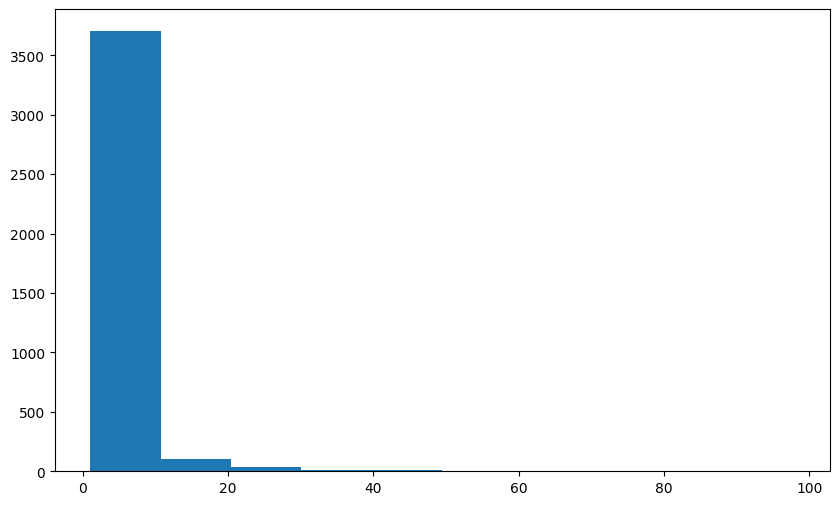

In [135]:
plt.figure(figsize=(10, 6))
plt.hist(num_grocery)
plt.show()

<span style='color:yellow'>Conclusion: The distribution of groceries in cities are like right-skewed but we still need the distribution of density by cities. Yuxuan</span>

## 2.2 Processing Data for Cities

In [136]:
df_cities = df_cities[['city', 'state_id', 'county_name', 'population', 'density']]
df_cities

,city,state_id,county_name,population,density
0,New York,NY,Queens,18908608,11080.3
1,Los Angeles,CA,Los Angeles,11922389,3184.7
2,Chicago,IL,Cook,8497759,4614.5
3,Miami,FL,Miami-Dade,6080145,4758.9
4,Houston,TX,Harris,5970127,1384.0
...,...,...,...,...,...
31115,Kohatk,AZ,Pinal,0,77.3
31116,Ironville,PA,Blair,0,59.2
31117,Newkirk,NM,Guadalupe,0,0.0
31118,Falcon Village,TX,Starr,0,38.9


In [137]:
df_cities = df_cities.copy()    # to avoid warning
df_cities = df_cities[(df_cities['density'] != 0)&(df_cities['population'] != 0)]   # drop missing values, which fill with 0
df_cities['area'] = df_cities['population'] / df_cities['density']  # density = population/area(km2)
df_cities = df_cities.reset_index().drop('index', axis = 1)
df_cities

,city,state_id,county_name,population,density,area
0,New York,NY,Queens,18908608,11080.3,1706.506864
1,Los Angeles,CA,Los Angeles,11922389,3184.7,3743.645869
2,Chicago,IL,Cook,8497759,4614.5,1841.534077
3,Miami,FL,Miami-Dade,6080145,4758.9,1277.636639
4,Houston,TX,Harris,5970127,1384.0,4313.675578
...,...,...,...,...,...,...
30621,Goldcreek,MT,Powell,1,1.9,0.526316
30622,Stotesbury,MO,Vernon,1,25.2,0.039683
30623,Kelly,KS,Nemaha,1,35.7,0.028011
30624,Arlington,WY,Carbon,1,2.9,0.344828


In [138]:
df_cities = df_cities.rename(columns={
    'state_id':'state',
    'county_name': 'county'
    })
df_cities

,city,state,county,population,density,area
0,New York,NY,Queens,18908608,11080.3,1706.506864
1,Los Angeles,CA,Los Angeles,11922389,3184.7,3743.645869
2,Chicago,IL,Cook,8497759,4614.5,1841.534077
3,Miami,FL,Miami-Dade,6080145,4758.9,1277.636639
4,Houston,TX,Harris,5970127,1384.0,4313.675578
...,...,...,...,...,...,...
30621,Goldcreek,MT,Powell,1,1.9,0.526316
30622,Stotesbury,MO,Vernon,1,25.2,0.039683
30623,Kelly,KS,Nemaha,1,35.7,0.028011
30624,Arlington,WY,Carbon,1,2.9,0.344828


In [139]:
df_cities['city'].nunique()

20513

There are cities sharing the same name.

In [140]:
df_city_area = df_cities.groupby(['state', 'city'], as_index=False).agg({
    'area': 'sum' 
}).rename(columns={'area': 'city area'})    # to avoid potential mistakes caused by the stuation above

df_city_area

,state,city,city area
0,AK,Adak,82.666667
1,AK,Akhiok,19.215686
2,AK,Akiachak,18.122271
3,AK,Akiak,4.893268
4,AK,Akutan,171.886792
...,...,...,...
30560,WY,Woods Landing-Jelm,43.333333
30561,WY,Worland,11.881481
30562,WY,Wright,7.871674
30563,WY,Y-O Ranch,6.222664


In [141]:
df_city_area_sorted = df_city_area.sort_values(by='city area', ascending=False)
df_city_area_sorted

,state,city,city area
235,AK,Sitka,7692.727273
115,AK,Juneau,6980.000000
13,AK,Anchorage,4417.537994
26347,TX,Houston,4313.675578
26026,TX,Dallas,3943.282613
...,...,...,...
14589,MO,Saint Catharine,0.020833
26590,TX,Los Ybanez,0.019407
18466,NM,Purty Rock,0.016273
26940,TX,Rafael Pena,0.007883


## 2.3 Processing Data for Illnesses

In [142]:
df_illness

,Age-Standardized Diagnosed Diabetes Prevalence (%),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females",...,"Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
1,National,NaN,6.52,6.27,6.78,6.96,6.7,7.23,7.37,7.1,...,10.21,9.98,9.6,10.38,10.22,9.85,10.62,56.61,57.09,56.85
2,Alabama,1,7.94,7.78,8.1,8.41,8.25,8.58,8.93,8.78,...,11.59,11.74,11.76,11.72,12.08,12.01,12.16,50.03,54.38,52.23
3,Autauga County,1001,7.84,7.7,7.99,8.25,8.09,8.42,8.67,8.47,...,11.21,11.24,10.84,11.68,11.44,10.92,12,50.21,41.97,46.03
4,Baldwin County,1003,6.35,5.5,7.26,6.73,5.85,7.66,7.15,6.27,...,10.12,9.52,8.87,10.22,9.76,9.16,10.39,43.24,66.52,53.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,Sweetwater County,56037,5.52,5.09,5.99,5.85,5.39,6.35,6.2,5.74,...,9.35,9.05,8.56,9.58,9.23,8.72,9.78,63.27,71.42,67.14
3191,Teton County,56039,3.25,3.18,3.33,3.6,3.53,3.68,3.88,3.8,...,5.82,5.81,5.66,5.97,5.91,5.76,6.07,82,81.26,81.63
3192,Uinta County,56041,5.22,5.15,5.3,5.57,5.51,5.64,5.88,5.8,...,8.35,8.12,7.72,8.56,8.57,8.11,9.05,70.73,57.53,64.02
3193,Washakie County,56043,5.64,6.07,5.19,5.97,6.41,5.5,6.21,6.58,...,8.08,7.94,7.73,8.15,8.27,7.92,8.63,66.45,30.54,46.53
